In [1]:
from voting_fns import plurality, iterative_plurality, RCR_iterative_plurality
import random
import matplotlib.pyplot as plt
import numpy as np
import os

Iterative Plurality vs Randomized Candidate Removal Iterative Plurality

In [2]:
num_voters = [10, 20, 50, 100, 200]
num_candidates = {10:[*range(2,11)],
                  20:[*range(2,21,2)],
                  50:[10,20,30,40,50],
                  100:[10,25,50,75,90,100],
                  200:[10,25,50,100,150,175,200],
                  500:[100,200,300,400,500],
                  1000:[125,250,500,750,1000]}

num_simulations = 200

plurality_results = []
RCR_results = []

same_result = []

for n in num_voters:
    for m in num_candidates[n]:
        if m > n:
            continue

        print((n,m))

        max_iter_p = 0
        sum_iter_p = 0

        max_iter_rcr = 0
        sum_iter_rcr = 0

        same = 0
        for i in range(num_simulations):
            if i%25 == 0:
                print("Simulation # ", i)

            
            L = []
            for voter in range(n):
                preference_profile = [*range(m)]
                random.shuffle(preference_profile)
                L.append(preference_profile)
            
            initial_state = [random.randint(0,m-1) for preference_profile in L]

            _, _, tc_p, num_iter_p = iterative_plurality(L, m, from_truth=False, initial_state=initial_state.copy())
            _, _, tc_rcr, num_iter_rcr = RCR_iterative_plurality(L, m, from_truth=False, initial_state=initial_state)

            if tc_p == tc_rcr:
                same += 1


            sum_iter_p += num_iter_p
            sum_iter_rcr += num_iter_rcr

            if num_iter_p > max_iter_p:
                max_iter_p = num_iter_p

            if num_iter_rcr > max_iter_rcr:
                max_iter_rcr = num_iter_rcr
        
        plurality_results.append([n, m, sum_iter_p/num_simulations, max_iter_p])
        RCR_results.append([n, m, sum_iter_rcr/num_simulations, max_iter_rcr])

        same_result.append([n, m, same/num_simulations])



(10, 2)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 3)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 4)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 5)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 6)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 7)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulation #  150
Simulation #  175
(10, 8)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
Simulation #  100
Simulation #  125
Simulat

In [3]:
print(plurality_results)
plurality_results = np.asarray(plurality_results)

[[10, 2, 19.35, 60], [10, 3, 24.7, 50], [10, 4, 24.3, 50], [10, 5, 27.8, 60], [10, 6, 29.35, 70], [10, 7, 29.15, 50], [10, 8, 29.7, 60], [10, 9, 31.25, 70], [10, 10, 31.5, 80], [20, 2, 37.8, 120], [20, 4, 60.4, 140], [20, 6, 60.6, 140], [20, 8, 69.1, 180], [20, 10, 74.6, 160], [20, 12, 74.9, 160], [20, 14, 71.9, 160], [20, 16, 73.6, 160], [20, 18, 78.2, 160], [20, 20, 79.5, 160], [50, 10, 206.5, 650], [50, 20, 242.25, 700], [50, 30, 248.0, 650], [50, 40, 250.5, 700], [50, 50, 250.75, 700], [100, 10, 412.5, 1800], [100, 25, 512.5, 1700], [100, 50, 523.0, 1700], [100, 75, 584.0, 2000], [100, 90, 605.0, 1900], [100, 100, 602.5, 1900], [200, 10, 788.0, 6600], [200, 25, 1090.0, 4800], [200, 50, 1332.0, 4600], [200, 100, 1300.0, 5400], [200, 150, 1467.0, 5000], [200, 175, 1465.0, 5000], [200, 200, 1529.0, 4800]]


In [4]:
print(RCR_results)
RCR_results = np.asarray(RCR_results)

[[10, 2, 10.0, 10], [10, 3, 16.55, 20], [10, 4, 22.3, 30], [10, 5, 28.0, 40], [10, 6, 29.8, 50], [10, 7, 29.35, 60], [10, 8, 29.95, 70], [10, 9, 31.25, 70], [10, 10, 31.5, 80], [20, 2, 20.0, 20], [20, 4, 45.7, 60], [20, 6, 65.0, 100], [20, 8, 69.6, 140], [20, 10, 74.8, 160], [20, 12, 75.1, 160], [20, 14, 71.9, 160], [20, 16, 73.6, 160], [20, 18, 78.2, 160], [20, 20, 79.5, 160], [50, 10, 248.5, 450], [50, 20, 242.25, 700], [50, 30, 248.0, 650], [50, 40, 250.5, 700], [50, 50, 250.75, 700], [100, 10, 539.5, 900], [100, 25, 524.5, 1700], [100, 50, 523.0, 1700], [100, 75, 584.0, 2000], [100, 90, 605.0, 1900], [100, 100, 602.5, 1900], [200, 10, 928.0, 1800], [200, 25, 1514.0, 4800], [200, 50, 1334.0, 4600], [200, 100, 1300.0, 5400], [200, 150, 1467.0, 5000], [200, 175, 1465.0, 5000], [200, 200, 1529.0, 4800]]


In [5]:
print(same_result)
same_result = np.asarray(same_result)

[[10, 2, 0.86], [10, 3, 0.735], [10, 4, 0.76], [10, 5, 0.795], [10, 6, 0.89], [10, 7, 0.97], [10, 8, 0.98], [10, 9, 1.0], [10, 10, 1.0], [20, 2, 0.88], [20, 4, 0.685], [20, 6, 0.665], [20, 8, 0.84], [20, 10, 0.965], [20, 12, 0.985], [20, 14, 1.0], [20, 16, 1.0], [20, 18, 1.0], [20, 20, 1.0], [50, 10, 0.54], [50, 20, 0.98], [50, 30, 1.0], [50, 40, 1.0], [50, 50, 1.0], [100, 10, 0.57], [100, 25, 0.95], [100, 50, 1.0], [100, 75, 1.0], [100, 90, 1.0], [100, 100, 1.0], [200, 10, 0.56], [200, 25, 0.72], [200, 50, 0.98], [200, 100, 1.0], [200, 150, 1.0], [200, 175, 1.0], [200, 200, 1.0]]


In [6]:
n_voters = num_voters.copy()
if 500 in n_voters:     
    n_voters.remove(500)

if 1000 in n_voters:
    n_voters.remove(1000)

figsize = (24,8)
figures_folder = "figures"

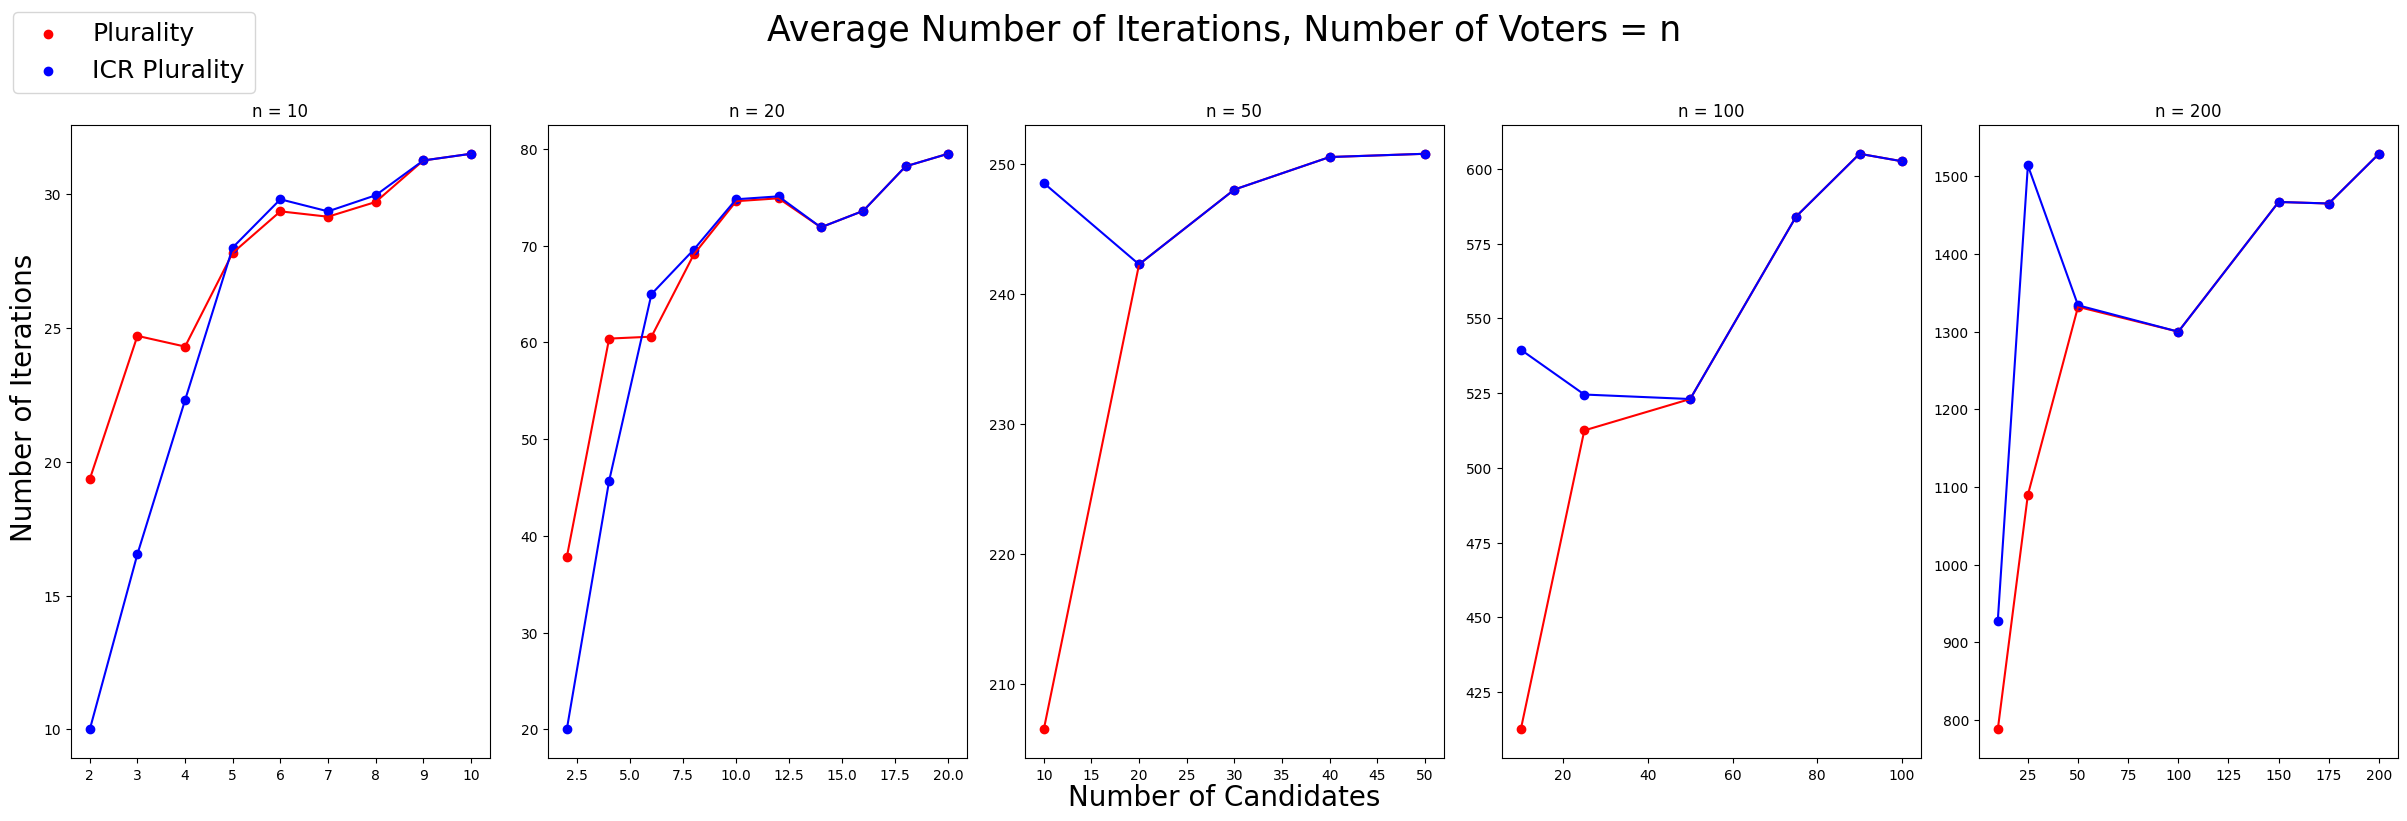

In [10]:
f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()
f.suptitle("Average Number of Iterations, Number of Voters = n", fontsize=25)
f.subplots_adjust(top=.84)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(0, 0.5, 'Number of Iterations', ha='center', va='center', rotation='vertical', fontsize=20)


for index,n in enumerate(n_voters):
    p_data = plurality_results[plurality_results[:,0] == n, 2]
    rcr_data = RCR_results[RCR_results[:,0] == n, 2]

    axs[index].title.set_text(f"n = {n}")
    

    axs[index].scatter(num_candidates[n], p_data, color='r', label="Plurality")
    axs[index].plot(num_candidates[n], p_data, color='r')

    axs[index].scatter(num_candidates[n], rcr_data, color='b', label="ICR Plurality")
    axs[index].plot(num_candidates[n], rcr_data, color='b')

handles, labels = axs[-1].get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', fontsize=18)

f.savefig(os.path.join(figures_folder, "AverageIterations.png"), bbox_inches="tight", pad_inches=0.25)


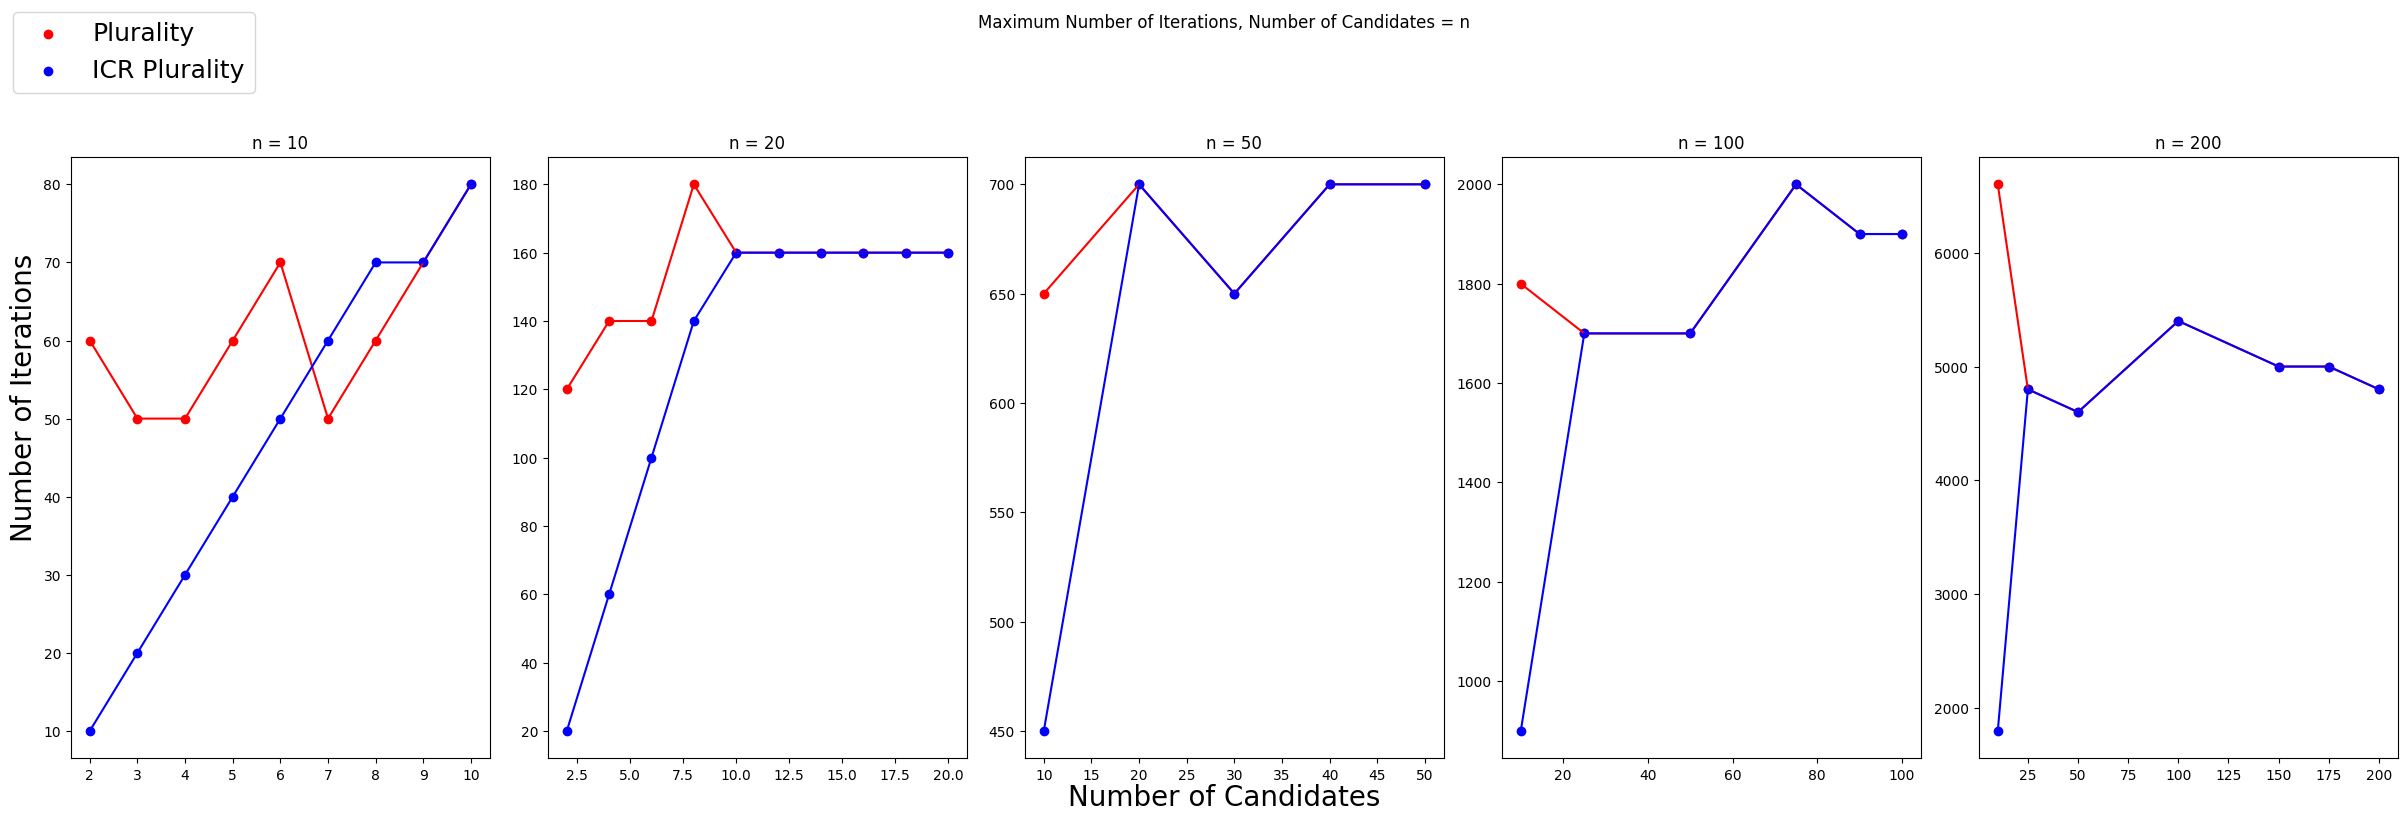

In [11]:

f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()

f.suptitle("Maximum Number of Iterations, Number of Candidates = n")
f.subplots_adjust(top=0.8)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(0, 0.5, 'Number of Iterations', ha='center', va='center', rotation='vertical', fontsize=20)

for index,n in enumerate(n_voters):
    p_data = plurality_results[plurality_results[:,0] == n, 3]
    rcr_data = RCR_results[RCR_results[:,0] == n, 3]

    axs[index].title.set_text(f"n = {n}")

    axs[index].scatter(num_candidates[n], p_data, color='r', label="Plurality")
    axs[index].plot(num_candidates[n], p_data, color='r')

    axs[index].scatter(num_candidates[n], rcr_data, color='b', label="ICR Plurality")
    axs[index].plot(num_candidates[n], rcr_data, color='b')

handles, labels = axs[-1].get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', fontsize=18)
f.savefig(os.path.join(figures_folder, "MaximumIterations.png"), bbox_inches="tight", pad_inches=0.25)

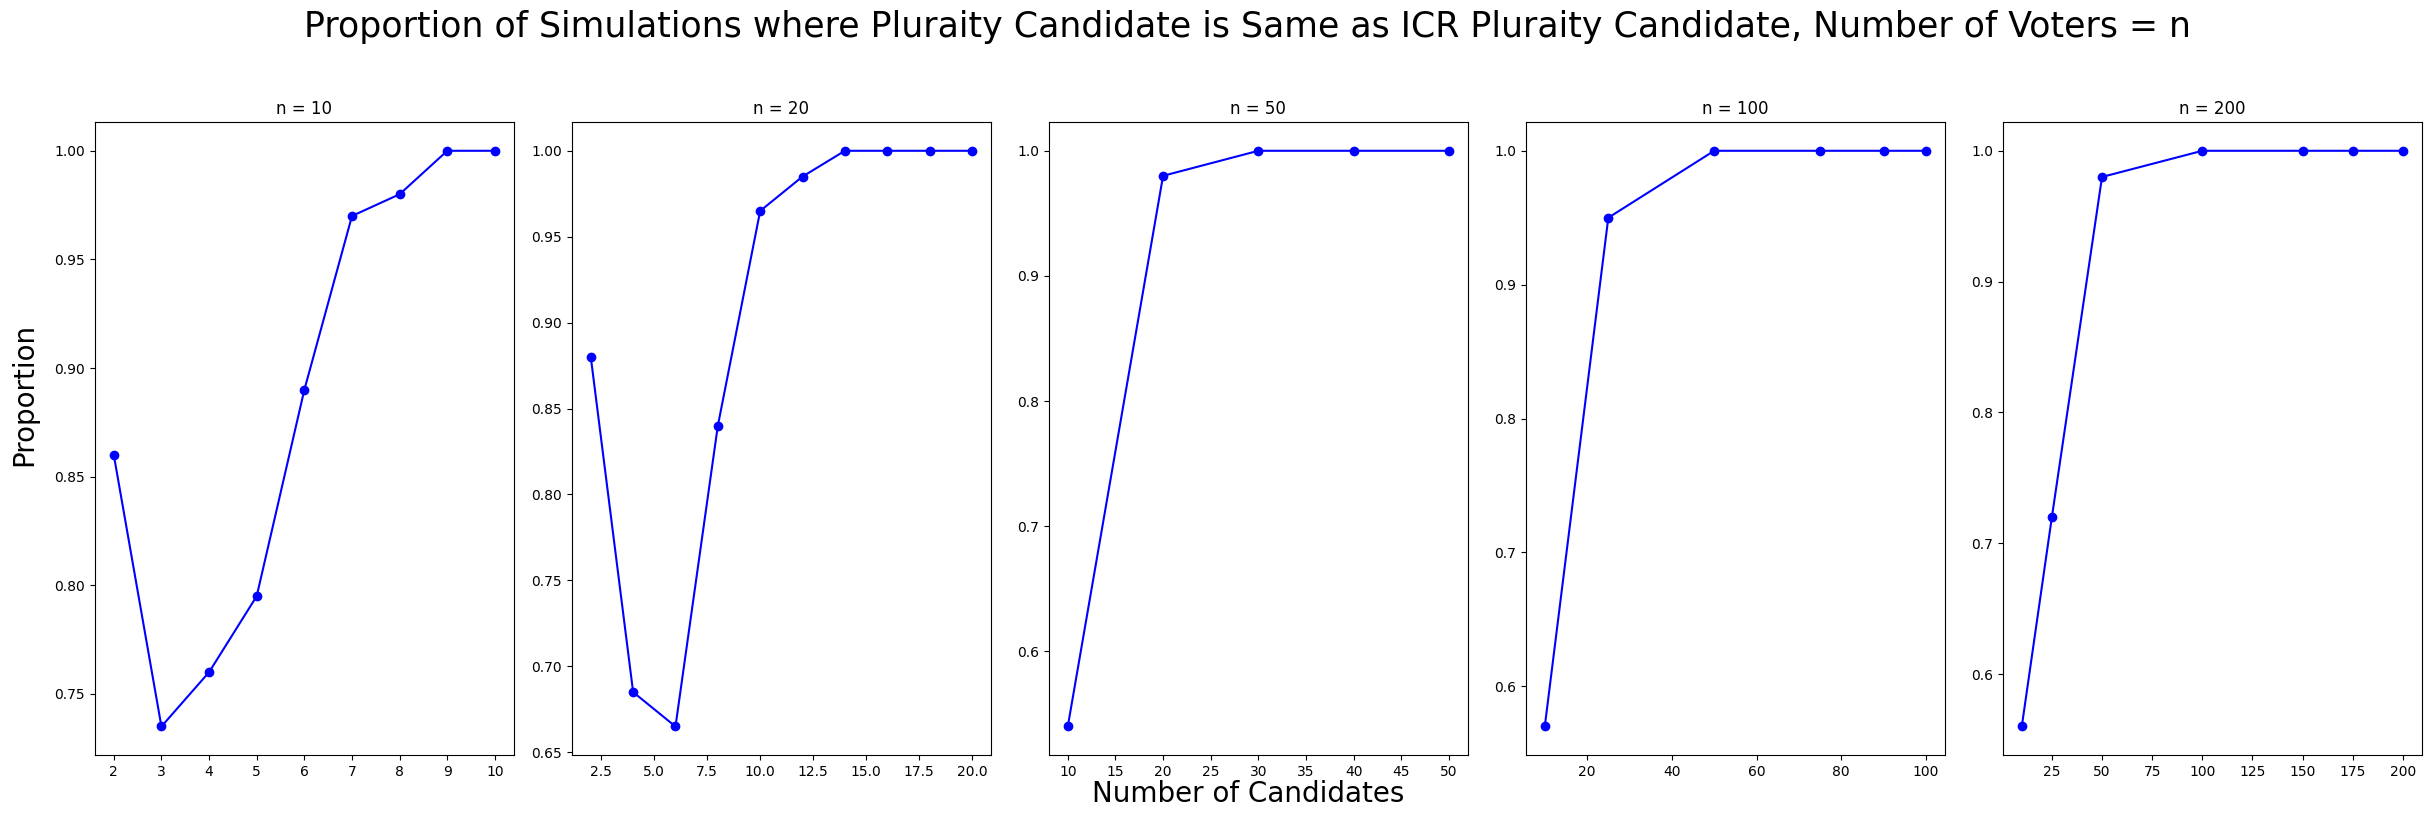

In [12]:
f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()
f.suptitle("Proportion of Simulations where Pluraity Candidate is Same as ICR Pluraity Candidate, Number of Voters = n", fontsize=25)
f.subplots_adjust(top=.84)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(-.01, 0.5, 'Proportion', ha='center', va='center', rotation='vertical', fontsize=20)


for index,n in enumerate(n_voters):
    same_data = same_result[same_result[:,0] == n, 2]

    axs[index].title.set_text(f"n = {n}")
    

    axs[index].scatter(num_candidates[n], same_data, color='b')
    axs[index].plot(num_candidates[n], same_data, color='b')


f.savefig(os.path.join(figures_folder, "SameProportion.png"), bbox_inches="tight", pad_inches=0.25)

In [ ]:
def get_L(n, m):
    L = []
    means = [i/(m-1) for i in range(m)]
    for voter in range(n):
        samples = []
        for mean in means:
            samples.append(np.random.normal(mean, 0.5, 1))
        
        
        



In [ ]:
num_voters = [10, 20, 50, 100, 200]
num_candidates = {10:[*range(2,11)],
                  20:[*range(2,21,2)],
                  50:[10,20,30,40,50],
                  100:[10,25,50,75,90,100],
                  200:[10,25,50,100,150,175,200],
                  500:[100,200,300,400,500],
                  1000:[125,250,500,750,1000]}

num_simulations = 200

plurality_results = []
RCR_results = []

same_result = []

for n in num_voters:
    for m in num_candidates[n]:
        if m > n:
            continue

        print((n,m))

        max_iter_p = 0
        sum_iter_p = 0

        max_iter_rcr = 0
        sum_iter_rcr = 0

        same = 0
        for i in range(num_simulations):
            if i%25 == 0:
                print("Simulation # ", i)

            
            L = get_L(n,m)
            
            initial_state = [random.randint(0,m-1) for preference_profile in L]

            _, _, tc_p, num_iter_p = iterative_plurality(L, m, from_truth=False, initial_state=initial_state.copy())
            _, _, tc_rcr, num_iter_rcr = RCR_iterative_plurality(L, m, from_truth=False, initial_state=initial_state)

            if tc_p == tc_rcr:
                same += 1


            sum_iter_p += num_iter_p
            sum_iter_rcr += num_iter_rcr

            if num_iter_p > max_iter_p:
                max_iter_p = num_iter_p

            if num_iter_rcr > max_iter_rcr:
                max_iter_rcr = num_iter_rcr
        
        plurality_results.append([n, m, sum_iter_p/num_simulations, max_iter_p])
        RCR_results.append([n, m, sum_iter_rcr/num_simulations, max_iter_rcr])

        same_result.append([n, m, same/num_simulations])

